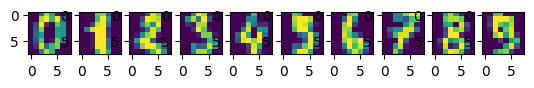

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [35]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [42]:
from sklearn.model_selection import train_test_split

# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(f"Accuracy : {accuracy}")

Accuracy : 0.7162726008344924


Question : Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure ?

In [37]:
# Nombre de tirages
n_tirages = 100
accuracies = []

# Effectuer 100 tirages
for _ in range(n_tirages):
    # Séparer les données en ensembles d'apprentissage et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    
    # Créer et entraîner le modèle
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    accuracy = clf.predict(X_test)
    
    # Ajout de tous les accuracy dans un tableau
    accuracies.append(accuracy)
    
# Calcul de la variance
variance = np.var(accuracies)

# Afficher les résultats
print(f"Accuracy moyenne : {np.mean(accuracies)}")
print(f"Variance : {variance}")
print(f"Ecart-type : {np.std(accuracies)}")


Accuracy moyenne : 4.473944444444444
Variance : 8.211987774691359
Ecart-type : 2.865656604461072


On obtient une accuracy très faible. Le modèle n'arrive pas à prédire de target. 
La variance obtenue est élevée par rapport à la moyenne de l'accuracy : peut-être signe d'overfitting. 
L'écart-type est aussi élevé.

Question : Calculer la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Comparer avec la variance du classifieur de base. Que pouvons-nous conclure ?

In [59]:
# Créer un classificateur Bagging avec un arbre de décision comme classificateur de base
# max_samples=0.8 : Utiliser 50% des échantillons pour chaque modèle
# max_features=0.6 : Utiliser 50% des caractéristiques pour chaque modèle
# n_estimators=100 : Créer 100 modèles de base
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.8, max_features=0.6, n_estimators=100)

# Entraîner le classificateur sur les données d'apprentissage
clf.fit(X_train, y_train)

# Prédire les classes pour les données de test
Z = clf.predict(X_test)

# Évaluer l'accuracy du modèle sur les données de test
accuracy = clf.score(X_test, y_test)

print(f"Accuracy : {accuracy}")

Accuracy : 0.9666295884315906


Il y a une meilleure accuracy

Question : Construire le graphique accuracy vs n_estimators. Que constatez-vous ?

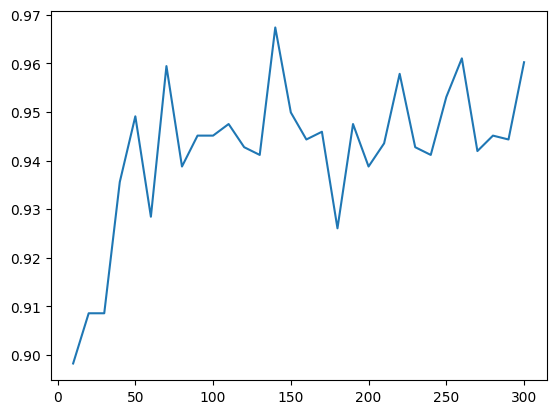

In [63]:
# Nombre de tirages
N = 30
accuracy = []

for i in range(N):
    # Séparer les données en ensembles d'apprentissage et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)
    
    # Créer un classificateur Bagging avec un arbre de décision comme classificateur de base
    # max_samples=0.8 : Utiliser 80% des échantillons pour chaque modèle
    # max_features=0.6 : Utiliser 60% des caractéristiques pour chaque modèle
    # n_estimators=(i+1)*10 : Augmenter le nombre de modèles de base de 10 à 300 (10, 20, ..., 300)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.8, max_features=0.6, n_estimators=(i+1)*10)
    
    # Entraîner le classificateur sur les données d'apprentissage
    clf.fit(X_train, y_train)
    
    # Prédire les classes pour les données de test
    Z = clf.predict(X_test)
    
    # Calculer et ajouter l'accuracy du modèle à la liste
    accuracy.append(clf.score(X_test, y_test))

# Importer la bibliothèque pour la visualisation
import matplotlib.pyplot as plt

# Tracer l'accuracy en fonction du nombre d'estimateurs
plt.plot([10*(i+1) for i in range(N)], accuracy)
# Afficher le graphique
plt.show()

Recherche des meilleurs optimisations des paramètres

In [62]:
from sklearn.model_selection import GridSearchCV

# Définir une grille de paramètres à tester pour le BaggingClassifier
pgrid = {
    "max_samples": [0.2, 0.4, 0.6, 0.8],  
    "max_features": [0.2, 0.4, 0.6, 0.8]  
}

# Créer un objet GridSearchCV pour effectuer une recherche sur les hyperparamètres
# BaggingClassifier avec un arbre de décision comme classificateur de base
# param_grid=pgrid : spécifie la grille de paramètres à tester
# cv=10 : utilise la validation croisée avec 10 plis pour évaluer les performances
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=10)

# Entraîner le modèle avec la recherche d'hyperparamètres sur les données d'apprentissage
grid_search.fit(X_train, y_train)

print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.8984700973574409
max_samples: 0.8
max_features: 0.6
